# Model Building and Analysis, 2014 to 2023 Data

In [3]:
import plotly.express as px
from IPython.core.display import HTML
HTML("<script src='https://cdn.plot.ly/plotly-latest.min.js'></script>")


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('hdb-price-with-features-2013to2023.csv').iloc[:, 1:]
df.head()

month    town flat_type block   street_name storey_range  \
0  2023-03-01  BISHAN    4 ROOM   289  BISHAN ST 24     22 TO 24   
1  2022-12-01  BISHAN    4 ROOM   289  BISHAN ST 24     22 TO 24   
2  2022-11-01  BISHAN    4 ROOM   289  BISHAN ST 24     16 TO 18   
3  2022-06-01  BISHAN    5 ROOM   289  BISHAN ST 24     07 TO 09   
4  2021-12-01  BISHAN    4 ROOM   289  BISHAN ST 24     07 TO 09   

   floor_area_sqm         flat_model  lease_commence_date  remaining_lease  \
0           103.0  Premium Apartment                 1998        74.333333   
1           102.0  Premium Apartment                 1998        74.583333   
2           102.0  Premium Apartment                 1998        74.666667   
3           121.0  Premium Apartment                 1998        75.083333   
4           102.0  Premium Apartment                 1998        75.583333   

   ...  mall_count_within_1km mall_list_within_1km  school_shortest_dist  \
0  ...                      1       ['Junction 8']              0.214393   
1  ...                      1       ['Junction 8']              0.214393   
2  ...                      1       ['Junction 8']              0.214393   
3  ...                      1       ['Junction 8']              0.214393   
4  ...                      1       ['Junction 8']              0.214393   

   school_shortest_dist_name good_sch_count_within_1km  \
0       Catholic High School                         1   
1       Catholic High School                         1   
2       Catholic High School                         1   
3       Catholic High School                         1   
4       Catholic High School                         1   

   good_sch_list_within_1km  good_sch_score good_sch_score_sap_gep  \
0  ['Catholic High School']               3                      2   
1  ['Catholic High School']               3                      2   
2  ['Catholic High School']               3                      2   
3  ['Catholic High School']               3                      2   
4  ['Catholic High School']               3                      2   

  distance_to_cbd_km  matured  
0           7.635584        1  
1           7.635584        1  
2           7.635584        1  
3           7.635584        1  
4           7.635584        1  

[5 rows x 30 columns]

In [15]:
df

month          town  flat_type block        street_name  \
0      2023-03-01        BISHAN     4 ROOM   289       BISHAN ST 24   
1      2022-12-01        BISHAN     4 ROOM   289       BISHAN ST 24   
2      2022-11-01        BISHAN     4 ROOM   289       BISHAN ST 24   
3      2022-06-01        BISHAN     5 ROOM   289       BISHAN ST 24   
4      2021-12-01        BISHAN     4 ROOM   289       BISHAN ST 24   
...           ...           ...        ...   ...                ...   
217186 2013-01-01    QUEENSTOWN     3 ROOM    26    TANGLIN HALT RD   
217187 2013-04-01    QUEENSTOWN     3 ROOM    64        C'WEALTH DR   
217188 2013-04-01    ANG MO KIO     3 ROOM   532  ANG MO KIO AVE 10   
217189 2013-02-01         BEDOK  EXECUTIVE   10C    BEDOK STH AVE 2   
217190 2013-01-01  CENTRAL AREA     3 ROOM  269C           QUEEN ST   

       storey_range  floor_area_sqm         flat_model  lease_commence_date  \
0          22 TO 24           103.0  Premium Apartment                 1998   
1          22 TO 24           102.0  Premium Apartment                 1998   
2          16 TO 18           102.0  Premium Apartment                 1998   
3          07 TO 09           121.0  Premium Apartment                 1998   
4          07 TO 09           102.0  Premium Apartment                 1998   
...             ...             ...                ...                  ...   
217186     07 TO 09            56.0           Standard                 1973   
217187     10 TO 12            56.0           Standard                 1969   
217188     01 TO 03            69.0     New Generation                 1980   
217189     01 TO 03           142.0          Apartment                 1995   
217190     04 TO 06            67.0     New Generation                 1984   

        remaining_lease  ...   school_shortest_dist_name  \
0             74.333333  ...        Catholic High School   
1             74.583333  ...        Catholic High School   
2             74.666667  ...        Catholic High School   
3             75.083333  ...        Catholic High School   
4             75.583333  ...        Catholic High School   
...                 ...  ...                         ...   
217186        59.000000  ...     New Town Primary School   
217187        55.000000  ...     New Town Primary School   
217188        66.000000  ...    Jing Shan Primary School   
217189        81.000000  ...  Bedok Green Primary School   
217190        70.000000  ...     Stamford Primary School   

       good_sch_count_within_1km  good_sch_list_within_1km  good_sch_score  \
0                              1  ['Catholic High School']               3   
1                              1  ['Catholic High School']               3   
2                              1  ['Catholic High School']               3   
3                              1  ['Catholic High School']               3   
4                              1  ['Catholic High School']               3   
...                          ...                       ...             ...   
217186                         0                        []               0   
217187                         0                        []               0   
217188                         0                        []               0   
217189                         0                        []               0   
217190                         1        ['Tao Nan School']               2   

       good_sch_score_sap_gep  distance_to_cbd_km  matured      CPI  \
0                           2            7.635584        1      NaN   
1                           2            7.635584        1  111.186   
2                           2            7.635584        1  110.959   
3                           2            7.635584        1  108.671   
4                           2            7.635584        1  104.439   
...                       ...                 ...      ...      ...   
217186                      0            5.895374      

In [4]:
cpi = pd.read_csv('monthly cpi.csv')
cpi = cpi.set_index('Data Series')
cpi_data = pd.DataFrame(cpi.columns, columns=['month'])
cpi_data['CPI'] = pd.to_numeric(np.array(cpi.loc['All Items']))
cpi_data = cpi_data.iloc[1: , :]
cpi_data['month'] = pd.to_datetime(cpi_data['month'])

cpi_data.head()

month      CPI
1 2023-01-01  111.397
2 2022-12-01  111.186
3 2022-11-01  110.959
4 2022-10-01  109.893
5 2022-09-01  110.339

In [5]:
cpi_data.dtypes

month    datetime64[ns]
CPI             float64
dtype: object

In [6]:
df['month'] = pd.to_datetime(df['month'])
df = pd.merge(df, cpi_data, how = 'left')
df['adjusted_price'] = (df['resale_price'] / df['CPI'].fillna(100))*100
df['year'] = pd.DatetimeIndex(df['month']).year
df.head()

month    town flat_type block   street_name storey_range  \
0 2023-03-01  BISHAN    4 ROOM   289  BISHAN ST 24     22 TO 24   
1 2022-12-01  BISHAN    4 ROOM   289  BISHAN ST 24     22 TO 24   
2 2022-11-01  BISHAN    4 ROOM   289  BISHAN ST 24     16 TO 18   
3 2022-06-01  BISHAN    5 ROOM   289  BISHAN ST 24     07 TO 09   
4 2021-12-01  BISHAN    4 ROOM   289  BISHAN ST 24     07 TO 09   

   floor_area_sqm         flat_model  lease_commence_date  remaining_lease  \
0           103.0  Premium Apartment                 1998        74.333333   
1           102.0  Premium Apartment                 1998        74.583333   
2           102.0  Premium Apartment                 1998        74.666667   
3           121.0  Premium Apartment                 1998        75.083333   
4           102.0  Premium Apartment                 1998        75.583333   

   ...  school_shortest_dist_name good_sch_count_within_1km  \
0  ...       Catholic High School                         1   
1  ...       Catholic High School                         1   
2  ...       Catholic High School                         1   
3  ...       Catholic High School                         1   
4  ...       Catholic High School                         1   

   good_sch_list_within_1km  good_sch_score good_sch_score_sap_gep  \
0  ['Catholic High School']               3                      2   
1  ['Catholic High School']               3                      2   
2  ['Catholic High School']               3                      2   
3  ['Catholic High School']               3                      2   
4  ['Catholic High School']               3                      2   

   distance_to_cbd_km  matured      CPI adjusted_price  year  
0            7.635584        1      NaN  750388.000000  2023  
1            7.635584        1  111.186  764484.737287  2022  
2            7.635584        1  110.959  683135.212105  2022  
3            7.635584        1  108.671  809783.658934  2022  
4            7.635584        1  104.439  579285.515947  2021  

[5 rows x 33 columns]

In [16]:
df.isna().sum()

month                           0
town                            0
flat_type                       0
block                           0
street_name                     0
storey_range                    0
floor_area_sqm                  0
flat_model                      0
lease_commence_date             0
remaining_lease                 0
resale_price                    0
address                         0
latitude                        0
longitude                       0
shortest_dist_mrt_name          0
shortest_dist_mrt               0
mrt_count_within_1km            0
mrt_list_within_1km             0
shortest_dist_mall_name         0
shortest_dist_mall              0
mall_count_within_1km           0
mall_list_within_1km            0
school_shortest_dist            0
school_shortest_dist_name       0
good_sch_count_within_1km       0
good_sch_list_within_1km        0
good_sch_score                  0
good_sch_score_sap_gep          0
distance_to_cbd_km              0
matured       

In [17]:
df['CPI'].dropna()

1         111.186
2         110.959
3         108.671
4         104.439
5         100.469
           ...   
217186     98.121
217187     97.112
217188     97.112
217189     99.107
217190     98.121
Name: CPI, Length: 214784, dtype: float64

In [18]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'address', 'latitude', 'longitude',
       'shortest_dist_mrt_name', 'shortest_dist_mrt', 'mrt_count_within_1km',
       'mrt_list_within_1km', 'shortest_dist_mall_name', 'shortest_dist_mall',
       'mall_count_within_1km', 'mall_list_within_1km', 'school_shortest_dist',
       'school_shortest_dist_name', 'good_sch_count_within_1km',
       'good_sch_list_within_1km', 'good_sch_score', 'good_sch_score_sap_gep',
       'distance_to_cbd_km', 'matured', 'CPI', 'adjusted_price', 'year'],
      dtype='object')

In [19]:
data = df.drop(['month','block', 'street_name', 'lease_commence_date',
                'resale_price','address', 'latitude', 'longitude',
                'shortest_dist_mrt_name', 'mrt_list_within_1km',
                'shortest_dist_mall_name','mall_list_within_1km',
                'school_shortest_dist_name', 'good_sch_list_within_1km', 'CPI'],
               axis = 1)
data.head()

town flat_type storey_range  floor_area_sqm         flat_model  \
0  BISHAN    4 ROOM     22 TO 24           103.0  Premium Apartment   
1  BISHAN    4 ROOM     22 TO 24           102.0  Premium Apartment   
2  BISHAN    4 ROOM     16 TO 18           102.0  Premium Apartment   
3  BISHAN    5 ROOM     07 TO 09           121.0  Premium Apartment   
4  BISHAN    4 ROOM     07 TO 09           102.0  Premium Apartment   

   remaining_lease  shortest_dist_mrt  mrt_count_within_1km  \
0        74.333333           0.754215                     1   
1        74.583333           0.754215                     1   
2        74.666667           0.754215                     1   
3        75.083333           0.754215                     1   
4        75.583333           0.754215                     1   

   shortest_dist_mall  mall_count_within_1km  school_shortest_dist  \
0            0.824707                      1              0.214393   
1            0.824707                      1              0.214393   
2            0.824707                      1              0.214393   
3            0.824707                      1              0.214393   
4            0.824707                      1              0.214393   

   good_sch_count_within_1km  good_sch_score  good_sch_score_sap_gep  \
0                          1               3                       2   
1                          1               3                       2   
2                          1               3                       2   
3                          1               3                       2   
4                          1               3                       2   

   distance_to_cbd_km  matured  adjusted_price  year  
0            7.635584        1   750388.000000  2023  
1            7.635584        1   764484.737287  2022  
2            7.635584        1   683135.212105  2022  
3            7.635584        1   809783.658934  2022  
4            7.635584        1   579285.515947  2021

In [20]:
# label encoding for Storey Range
# The higher the storey_range, the higher the label encoding
le = LabelEncoder()
data = data.sort_values(by='storey_range')
data['storey_range'] = le.fit_transform(data['storey_range'])
data

town flat_type  storey_range  floor_area_sqm  \
149500        YISHUN    4 ROOM             0           104.0   
103026         BEDOK    5 ROOM             0           121.0   
39255      TOA PAYOH    3 ROOM             0            68.0   
103022         BEDOK    5 ROOM             0           121.0   
103019         BEDOK    5 ROOM             0           137.0   
...              ...       ...           ...             ...   
6448    CENTRAL AREA    4 ROOM            16            94.0   
32175   CENTRAL AREA    4 ROOM            16            94.0   
6513    CENTRAL AREA    4 ROOM            16            94.0   
129341  CENTRAL AREA    5 ROOM            16           105.0   
6683    CENTRAL AREA    4 ROOM            16            94.0   

                flat_model  remaining_lease  shortest_dist_mrt  \
149500             Model A        70.000000           1.121243   
103026            Improved        62.666667           0.654595   
39255             Improved        47.250000           0.985550   
103022            Improved        60.083333           0.654595   
103019  Model A-Maisonette        70.000000           1.503240   
...                    ...              ...                ...   
6448               Type S1        88.250000           0.504834   
32175              Type S1        87.666667           0.300452   
6513               Type S1        94.000000           0.504834   
129341             Type S2        89.250000           0.264816   
6683               Type S1        92.833333           0.390244   

        mrt_count_within_1km  shortest_dist_mall  mall_count_within_1km  \
149500                     0            0.892542                      2   
103026                     2            1.937973                      0   
39255                      1            1.454343                      0   
103022                     2            1.937973                      0   
103019                     0            1.173192                      0   
...                      ...                 ...                    ...   
6448                       2            0.125445                      3   
32175                      4            0.267698                      4   
6513                       2            0.264875                      2   
129341                     4            0.295279                      4   
6683                       3            0.178959                      3   

        school_shortest_dist  good_sch_count_within_1km  good_sch_score  \
149500              0.165144                          0               0   
103026              0.218787                          0               0   
39255               0.141342                          1               1   
103022              0.218787                          0               0   
103019              0.533189                          1               1   
...                      ...                        ...             ...   
6448                0.146162                          0               0   
32175               0.303171                          0               0   
6513                0.146162                          0               0   
129341              0.284877                          0               0   
6683                0.183819                          0               0   

        good_sch_score_sap_gep  distance_to_cbd_km  matured  adjusted_price  \
149500                       0           15.229937        0    3.523260e+05   
103026                       0            8.307092        1    4.286070e+05   
39255                        1            5.664920        1    2.770357e+05   
103022                       0            8.307092        1    5.025270e+05   
103019                       1           10.065695        1    6.289691e+05   
...                        ...                 ...      ...             ...   
6448                         0            1.803958        0    1.097620e+06   
32175               

In [21]:
data['flat_type'].value_counts()

4 ROOM              89434
3 ROOM              54630
5 ROOM              53198
EXECUTIVE           16709
2 ROOM               3035
1 ROOM                 98
MULTI-GENERATION       87
Name: flat_type, dtype: int64

In [22]:
# remove flat_types with less than 1000 instances
flat_types_counts = data['flat_type'].value_counts()
data = data[~data['flat_type'].isin(flat_types_counts[flat_types_counts < 1000].index)]
data['flat_type'].value_counts()

4 ROOM       89434
3 ROOM       54630
5 ROOM       53198
EXECUTIVE    16709
2 ROOM        3035
Name: flat_type, dtype: int64

 1 Room and Multi-Generation flats are removed.

In [23]:
# label encoding for Flat Type
data = data.sort_values(by='flat_type')
data


town  flat_type  storey_range  floor_area_sqm  flat_model  \
139670     SENGKANG     2 ROOM             3            47.0     Model A   
23425   JURONG EAST     2 ROOM             4            47.0     Model A   
216836      GEYLANG     2 ROOM             2            50.0    Standard   
160100  BUKIT MERAH     2 ROOM             0            49.0    Standard   
23446   JURONG EAST     2 ROOM             4            47.0     Model A   
...             ...        ...           ...             ...         ...   
207515       BISHAN  EXECUTIVE             1           149.0  Maisonette   
207514       BISHAN  EXECUTIVE             1           149.0  Maisonette   
207512       BISHAN  EXECUTIVE             1           146.0  Maisonette   
114433    WOODLANDS  EXECUTIVE             1           189.0   Apartment   
51028      SENGKANG  EXECUTIVE             0           140.0  Maisonette   

        remaining_lease  shortest_dist_mrt  mrt_count_within_1km  \
139670        92.500000           1.679652                     0   
23425         92.750000           1.198840                     0   
216836        54.000000           0.441429                     2   
160100        56.000000           0.456153                     1   
23446         94.333333           1.198840                     0   
...                 ...                ...                   ...   
207515        71.833333           0.556969                     1   
207514        71.250000           0.556969                     1   
207512        70.750000           0.556969                     1   
114433        75.666667           0.508104                     1   
51028         79.333333           0.872715                     1   

        shortest_dist_mall  mall_count_within_1km  school_shortest_dist  \
139670            0.612240                      2              0.615462   
23425             1.162130                      0              1.548739   
216836            2.102417                      0              0.728915   
160100            0.483975                      2              0.710211   
23446             1.162130                      0              1.548739   
...                    ...                    ...                   ...   
207515            0.680325                      1              0.412845   
207514            0.680325                      1              0.412845   
207512            0.680325                      1              0.412845   
114433            0.352256                      4              0.356366   
51028             0.421567                      1              0.560152   

        good_sch_count_within_1km  good_sch_score  good_sch_score_sap_gep  \
139670                          1               1                       0   
23425                           0               0                       0   
216836                          2               2                       0   
160100                          0               0                       0   
23446                           0               0                       0   
...                           ...             ...                     ...   
207515                          1               3                       2   
207514                          1               3                       2   
207512                          1               3                       2   
114433                          0               0                       0   
51028                           0               0                       0   

        distance_to_cbd_km  matured  adjusted_price  year  
139670           12.972290        0   274890.723652  2021  
23425            13.106423        0   228981.034397  2019  
216836            6.181252        1   281600.720898  2013  
160100            2.309575        1   295792.054134  2013  
23446            13.106423        0   232149.138234  2018  
...                    ...      ...             ...   ...  
207515            7.564648        1   8

In [24]:
data['flat_type'] = le.fit_transform(data['flat_type'])
data

town  flat_type  storey_range  floor_area_sqm  flat_model  \
139670     SENGKANG          0             3            47.0     Model A   
23425   JURONG EAST          0             4            47.0     Model A   
216836      GEYLANG          0             2            50.0    Standard   
160100  BUKIT MERAH          0             0            49.0    Standard   
23446   JURONG EAST          0             4            47.0     Model A   
...             ...        ...           ...             ...         ...   
207515       BISHAN          4             1           149.0  Maisonette   
207514       BISHAN          4             1           149.0  Maisonette   
207512       BISHAN          4             1           146.0  Maisonette   
114433    WOODLANDS          4             1           189.0   Apartment   
51028      SENGKANG          4             0           140.0  Maisonette   

        remaining_lease  shortest_dist_mrt  mrt_count_within_1km  \
139670        92.500000           1.679652                     0   
23425         92.750000           1.198840                     0   
216836        54.000000           0.441429                     2   
160100        56.000000           0.456153                     1   
23446         94.333333           1.198840                     0   
...                 ...                ...                   ...   
207515        71.833333           0.556969                     1   
207514        71.250000           0.556969                     1   
207512        70.750000           0.556969                     1   
114433        75.666667           0.508104                     1   
51028         79.333333           0.872715                     1   

        shortest_dist_mall  mall_count_within_1km  school_shortest_dist  \
139670            0.612240                      2              0.615462   
23425             1.162130                      0              1.548739   
216836            2.102417                      0              0.728915   
160100            0.483975                      2              0.710211   
23446             1.162130                      0              1.548739   
...                    ...                    ...                   ...   
207515            0.680325                      1              0.412845   
207514            0.680325                      1              0.412845   
207512            0.680325                      1              0.412845   
114433            0.352256                      4              0.356366   
51028             0.421567                      1              0.560152   

        good_sch_count_within_1km  good_sch_score  good_sch_score_sap_gep  \
139670                          1               1                       0   
23425                           0               0                       0   
216836                          2               2                       0   
160100                          0               0                       0   
23446                           0               0                       0   
...                           ...             ...                     ...   
207515                          1               3                       2   
207514                          1               3                       2   
207512                          1               3                       2   
114433                          0               0                       0   
51028                           0               0                       0   

        distance_to_cbd_km  matured  adjusted_price  year  
139670           12.972290        0   274890.723652  2021  
23425            13.106423        0   228981.034397  2019  
216836            6.181252        1   281600.720898  2013  
160100            2.309575        1   295792.054134  2013  
23446            13.106423        0   232149.138234  2018  
...                    ...      ...             ...   ...  
207515            7.564648        1   8

In [25]:
data['flat_model'].value_counts()

Model A                   69776
Improved                  54604
New Generation            31053
Premium Apartment         23264
Simplified                 9544
Apartment                  8413
Standard                   6703
Maisonette                 6246
DBSS                       2943
Model A2                   2782
Type S1                     401
Model A-Maisonette          386
Adjoined flat               362
Type S2                     206
Terrace                     132
Premium Apartment Loft       96
2-room                       42
Improved-Maisonette          29
Premium Maisonette           17
3Gen                          7
Name: flat_model, dtype: int64

In [26]:
# Re-categorize flat models into broader categories
replace_values = {'Model A-Maisonette':'Maisonette', 'Improved-Maisonette':'Maisonette',
                 'Premium Maisonette':'Maisonette',}
data = data.replace({'flat_model': replace_values})
data['flat_model'].value_counts()

Model A                   69776
Improved                  54604
New Generation            31053
Premium Apartment         23264
Simplified                 9544
Apartment                  8413
Standard                   6703
Maisonette                 6678
DBSS                       2943
Model A2                   2782
Type S1                     401
Adjoined flat               362
Type S2                     206
Terrace                     132
Premium Apartment Loft       96
2-room                       42
3Gen                          7
Name: flat_model, dtype: int64

In [27]:
# remove flat models with less than 1000 instances
flat_model_counts = data['flat_model'].value_counts()
data = data[~data['flat_model'].isin(flat_model_counts[flat_model_counts < 1000].index)]
data['flat_model'].value_counts()

Model A              69776
Improved             54604
New Generation       31053
Premium Apartment    23264
Simplified            9544
Apartment             8413
Standard              6703
Maisonette            6678
DBSS                  2943
Model A2              2782
Name: flat_model, dtype: int64

In [28]:
data['town'].sort_values().unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [29]:
data['flat_model'].sort_values().unique()

array(['Apartment', 'DBSS', 'Improved', 'Maisonette', 'Model A',
       'Model A2', 'New Generation', 'Premium Apartment', 'Simplified',
       'Standard'], dtype=object)

In [30]:
data = pd.get_dummies(data, columns = ['town','flat_model'],drop_first = True)
data.sort_index(inplace = True)
data.columns

Index(['flat_type', 'storey_range', 'floor_area_sqm', 'remaining_lease',
       'shortest_dist_mrt', 'mrt_count_within_1km', 'shortest_dist_mall',
       'mall_count_within_1km', 'school_shortest_dist',
       'good_sch_count_within_1km', 'good_sch_score', 'good_sch_score_sap_gep',
       'distance_to_cbd_km', 'matured', 'adjusted_price', 'year', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'flat_model_DBSS', 'flat_model_Improved', 'flat_model_Maisonette',
       'flat_model_Model A', 'flat_model_Model A2',
       'flat_

In order to account for multicollinearity, we drop one of the dummy variables.

For the town dummies, Ang Mo Kio is dropped. For the flat_model dummies, Apartment is dropped.

### Check for Multicolinearity and VIF

In [31]:
data.dtypes

flat_type                         int32
storey_range                      int32
floor_area_sqm                  float64
remaining_lease                 float64
shortest_dist_mrt               float64
mrt_count_within_1km              int64
shortest_dist_mall              float64
mall_count_within_1km             int64
school_shortest_dist            float64
good_sch_count_within_1km         int64
good_sch_score                    int64
good_sch_score_sap_gep            int64
distance_to_cbd_km              float64
matured                           int64
adjusted_price                  float64
year                              int64
town_BEDOK                        uint8
town_BISHAN                       uint8
town_BUKIT BATOK                  uint8
town_BUKIT MERAH                  uint8
town_BUKIT PANJANG                uint8
town_BUKIT TIMAH                  uint8
town_CENTRAL AREA                 uint8
town_CHOA CHU KANG                uint8
town_CLEMENTI                     uint8


In [32]:
data['flat_type'] = data['flat_type'].astype("int64")
data['storey_range'] = data['storey_range'].astype("int64")

C:\Users\raych\AppData\Local\Temp\ipykernel_22392\1764189709.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


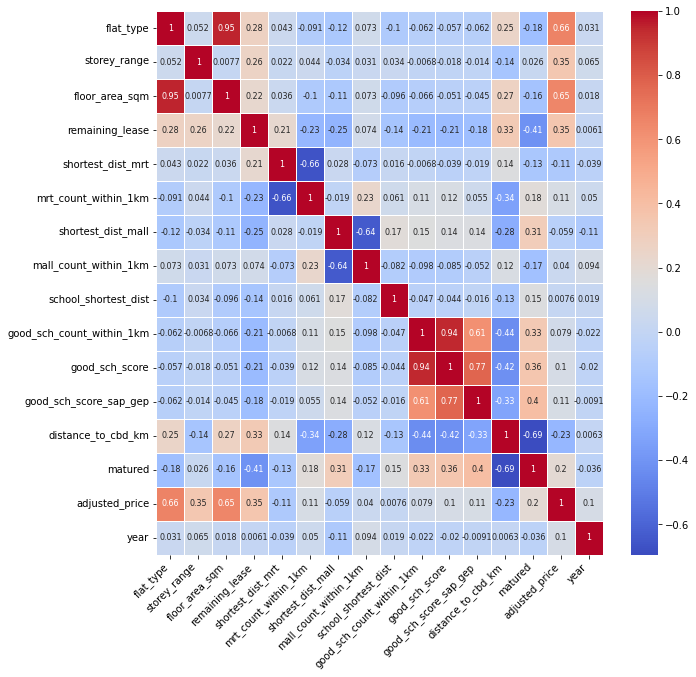

In [33]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(data.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g', 
      cmap = 'coolwarm', linewidth=0.5, annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
fig.show()


High correlation (>0.6) between:

- flat_type and floor_area_sqm (0.95)
- shortest_dist_mrt and mrt_count_within_1km (-0.68)
- mall_count_within_1km and shortest_dist_mall (-0.7)
- good_sch_count_within_1km and good_sch_score (0.94)
- good_sch_score_sap_gep and good_sch_count_within_1km (0.6)
- good_sch_score_sap_ge and good_sch_score (0.76)
- distance_to_cbd_km and matured (-0.7)



If the largest VIF is greater than 10 then there is cause for concern (Bowerman & O’Connell, 1990; Myers, 1990)

If the average VIF is substantially greater than 1 then the regression may be biased (Bowerman & O’Connell, 1990).

Tolerance below 0.1 indicates a serious problem.

Tolerance below 0.2 indicates a potential problem (Menard, 1995).

In [34]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['tolerance'] = 1/vif.VIF
    vif['meanVIF'] = vif.VIF.mean()

    return(vif)

vif_df = calc_vif(data.drop('adjusted_price',axis=1).select_dtypes(include=['int64','float64']))
vif_df

variables         VIF  tolerance    meanVIF
0                   flat_type   73.623977   0.013583  39.471484
1                storey_range    2.696498   0.370851  39.471484
2              floor_area_sqm  199.542799   0.005011  39.471484
3             remaining_lease   53.627204   0.018647  39.471484
4           shortest_dist_mrt    7.830648   0.127703  39.471484
5        mrt_count_within_1km    4.872612   0.205229  39.471484
6          shortest_dist_mall    7.681541   0.130182  39.471484
7       mall_count_within_1km    4.563306   0.219139  39.471484
8        school_shortest_dist    3.999156   0.250053  39.471484
9   good_sch_count_within_1km   17.961900   0.055673  39.471484
10             good_sch_score   26.422103   0.037847  39.471484
11     good_sch_score_sap_gep    4.391022   0.227737  39.471484
12         distance_to_cbd_km   23.328839   0.042865  39.471484
13                    matured    4.198440   0.238184  39.471484
14                       year  157.332215   0.006356  39.471484

- flat_type and floor_area_sqm (0.95)
- shortest_dist_mrt and mrt_count_within_1km (-0.68)
- mall_count_within_1km and shortest_dist_mall (-0.7)
- good_sch_count_within_1km and good_sch_score (0.94)
- good_sch_score_sap_gep and good_sch_count_within_1km (0.6)
- good_sch_score_sap_ge and good_sch_score (0.76)
- distance_to_cbd_km and matured (-0.7)

between flat_type and floor_area_sqm, we will drop flat_type as floor_area_sqm could have more potential for feature explanation as it is a continuous variable, while flat_type has been label encoded.

For the mrt, mall, sch features, we will choose to drop the features that measure the count within 1km first, for reasons being the shortest distance features being continuous.

Between distance to cbd and matured features, we will drop matured as distance to cbd is a continous variable as well.

Between good_sch_score_sap_gep and good_sch_score, we will just drop good_sch_score_sap_gep for the time being. Depending on the results of the good_sch_score feature results, we will decide if there is reason to run the models again but with good_sch_score_sap_gep instead.

year variable is dropped as well, as we have already accounted for resale price inflation using CPI values. This should account for majority of the impact that year has on resale prices, due to the fact that generally why prices increases over time is due to inflation. It is also dropped for model simplicity.


In [35]:
dropped_features = ['mrt_count_within_1km','mall_count_within_1km',
                    'matured','good_sch_count_within_1km','flat_type','good_sch_score_sap_gep',
                    'year']

calc_vif(data.drop(dropped_features,axis=1).
         drop('adjusted_price', axis = 1).
         select_dtypes(include=['int64','float64']))

variables        VIF  tolerance   meanVIF
0          storey_range   2.677816   0.373439  9.206758
1        floor_area_sqm  17.208520   0.058111  9.206758
2       remaining_lease  27.905570   0.035835  9.206758
3     shortest_dist_mrt   4.286971   0.233265  9.206758
4    shortest_dist_mall   3.817710   0.261937  9.206758
5  school_shortest_dist   3.576506   0.279602  9.206758
6        good_sch_score   1.556816   0.642337  9.206758
7    distance_to_cbd_km  12.624152   0.079213  9.206758

We observe that remaining_lease and floor_area_sqm still has a very high VIF score, but we shall still keep these features as we feel they are important explainators of hdb resale price.

### Performance Measure

In [36]:
def model_performance(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print('R^2 score =', r2)
    print('MAE:', mae)
    print('RMSE', rmse)
    
    
    return(r2, mae, rmse)
    

### Train Test Split

In [37]:
df_1 = data.drop(columns = dropped_features)

# Split target variable from dataset
y= df_1['adjusted_price']
X = df_1.drop(columns='adjusted_price')


In [38]:
X

storey_range  floor_area_sqm  remaining_lease  shortest_dist_mrt  \
0                  7           103.0        74.333333           0.754215   
1                  7           102.0        74.583333           0.754215   
2                  5           102.0        74.666667           0.754215   
3                  2           121.0        75.083333           0.754215   
4                  2           102.0        75.583333           0.754215   
...              ...             ...              ...                ...   
217186             2            56.0        59.000000           0.515838   
217187             3            56.0        55.000000           0.369882   
217188             0            69.0        66.000000           0.749353   
217189             0           142.0        81.000000           1.259868   
217190             1            67.0        70.000000           0.240490   

        shortest_dist_mall  school_shortest_dist  good_sch_score  \
0                 0.824707              0.214393               3   
1                 0.824707              0.214393               3   
2                 0.824707              0.214393               3   
3                 0.824707              0.214393               3   
4                 0.824707              0.214393               3   
...                    ...                   ...             ...   
217186            1.203264              0.173506               0   
217187            1.192208              0.321240               0   
217188            0.788194              0.324541               0   
217189            0.861002              0.237382               0   
217190            0.183585              0.526720               2   

        distance_to_cbd_km  town_BEDOK  town_BISHAN  ...  town_YISHUN  \
0                 7.635584           0            1  ...            0   
1                 7.635584           0            1  ...            0   
2                 7.635584           0            1  ...            0   
3                 7.635584           0            1  ...            0   
4                 7.635584           0            1  ...            0   
...                    ...         ...          ...  ...          ...   
217186            5.895374           0            0  ...            0   
217187            6.199401           0            0  ...            0   
217188            9.498989           0            0  ...            0   
217189           10.127127           1            0  ...            0   
217190            1.428059           0            0  ...            0   

        flat_model_DBSS  flat_model_Improved  flat_model_Maisonette  \
0                     0                    0                      0   
1                     0                    0                      0   
2                     0                    0                      0   
3                     0                    0                      0   
4                     0                    0                      0   
...                 ...                  ...                    ...   
217186                0                    0                      0   
217187                0                    0                      0   
217188                0                    0                      0   
217189                0                    0                      0   
217190                0                    0                      0   

        flat_model_Model A  flat_model_Model A2  flat_model_New Generation  \
0                        0                    0                          0   
1                        0                    0                          0   
2                        0                    0                          0   
3                        0                    0                          0   
4                        0                    0                          0   
...                    ...                  ...                        ...   
21

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [40]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

172608 43152
172608 43152


### Feature Scaling

In [41]:
# Scale dataset
continuous_features = ['floor_area_sqm', 'remaining_lease','shortest_dist_mrt',
                 'shortest_dist_mall', 'school_shortest_dist', 'distance_to_cbd_km']

scaler = StandardScaler()
X_train_continuous = X_train[continuous_features]
X_train_continuous = scaler.fit_transform(X_train_continuous)

X_test_continuous = X_test[continuous_features]
X_test_continuous = scaler.transform(X_test_continuous)

# Replace original continuous features with scaled ones in X

X_train[continuous_features] = X_train_continuous
X_test[continuous_features] = X_test_continuous

In [42]:
X_train

storey_range  floor_area_sqm  remaining_lease  shortest_dist_mrt  \
15580              2       -0.998557        -0.911747          -0.219190   
79337              2        0.453227        -1.049132          -1.181970   
100839             2        0.287309        -0.283703           0.397181   
40938              3       -0.168966        -0.643520          -0.384295   
105408             2       -0.210445        -1.068758           2.083922   
...              ...             ...              ...                ...   
66318              0       -0.915598        -0.597725           0.288099   
78499              1        0.328789        -0.322956          -1.062610   
212109             0        1.158380         0.409762          -0.787881   
56758              2        0.287309        -0.761278          -0.504996   
39004              0       -1.247434        -2.148209          -0.174589   

        shortest_dist_mall  school_shortest_dist  good_sch_score  \
15580             0.145591              0.417011               2   
79337             0.474732              0.200623               0   
100839            0.349683              1.178963               0   
40938            -1.256916             -0.553823               0   
105408           -0.323151              0.520961               1   
...                    ...                   ...             ...   
66318             0.549116              0.960116               1   
78499             1.572633              0.763628               0   
212109           -0.678571             -1.211267               0   
56758             0.147404             -0.061300               3   
39004             1.173675             -0.609230               1   

        distance_to_cbd_km  town_BEDOK  town_BISHAN  ...  town_YISHUN  \
15580            -0.598740           0            0  ...            0   
79337             0.318094           0            0  ...            0   
100839            1.056425           0            0  ...            0   
40938             0.920318           0            0  ...            1   
105408           -0.560811           1            0  ...            0   
...                    ...         ...          ...  ...          ...   
66318            -0.764001           1            0  ...            0   
78499             0.444479           0            0  ...            0   
212109            0.043268           0            0  ...            0   
56758            -0.470074           0            0  ...            0   
39004            -1.576328           0            0  ...            0   

        flat_model_DBSS  flat_model_Improved  flat_model_Maisonette  \
15580                 0                    0                      0   
79337                 0                    0                      0   
100839                0                    0                      0   
40938                 0                    0                      0   
105408                0                    0                      0   
...                 ...                  ...                    ...   
66318                 0                    0                      0   
78499                 0                    0                      0   
212109                0                    0                      0   
56758                 0                    0                      0   
39004                 0                    1                      0   

        flat_model_Model A  flat_model_Model A2  flat_model_New Generation  \
15580                    0                    0                          1   
79337                    1                    0                          0   
100839                   1                    0                          0   
40938                    0                    0                          1   
105408                   0                    0                          1   
...                    ...                  ...                        ...   
66

In [43]:
X_test

storey_range  floor_area_sqm  remaining_lease  shortest_dist_mrt  \
171170             0        0.245830        -0.538846          -0.109694   
170486             3       -1.205954        -0.754736          -1.043354   
142664             4        1.241339        -0.100524           1.076450   
166731             3       -0.293404         1.018179          -0.945443   
97584              2       -0.625241        -1.009879          -0.673045   
...              ...             ...              ...                ...   
203232             3        1.324298         0.265835          -0.468724   
12918              0       -0.210445         1.508839          -0.103458   
211177             1       -0.168966         1.149022           0.826356   
8013               2       -0.874118        -1.978113          -1.315470   
97117              1       -0.251925        -0.676231           0.336581   

        shortest_dist_mall  school_shortest_dist  good_sch_score  \
171170            0.055119             -1.027764               1   
170486            0.588785              0.353329               0   
142664           -0.041177             -0.493227               0   
166731           -0.099957             -0.632235               0   
97584            -0.401977             -1.060400               0   
...                    ...                   ...             ...   
203232           -0.810904             -1.057700               0   
12918             0.077979             -1.112328               0   
211177           -0.614291             -1.239370               0   
8013              0.417498              0.366404               0   
97117            -0.510823              2.297689               0   

        distance_to_cbd_km  town_BEDOK  town_BISHAN  ...  town_YISHUN  \
171170            0.282983           0            0  ...            0   
170486           -0.419751           0            0  ...            0   
142664            0.801918           0            0  ...            0   
166731           -0.056253           0            0  ...            0   
97584             0.985456           0            0  ...            0   
...                    ...         ...          ...  ...          ...   
203232            0.462694           0            0  ...            0   
12918             0.134484           0            0  ...            0   
211177            0.494265           0            0  ...            0   
8013             -1.380488           0            0  ...            0   
97117            -0.436026           0            0  ...            0   

        flat_model_DBSS  flat_model_Improved  flat_model_Maisonette  \
171170                0                    0                      0   
170486                0                    0                      0   
142664                0                    1                      0   
166731                0                    0                      0   
97584                 0                    0                      0   
...                 ...                  ...                    ...   
203232                0                    1                      0   
12918                 0                    0                      0   
211177                0                    0                      0   
8013                  0                    1                      0   
97117                 0                    0                      0   

        flat_model_Model A  flat_model_Model A2  flat_model_New Generation  \
171170                   1                    0                          0   
170486                   0                    0                          1   
142664                   0                    0                          0   
166731                   0                    0                          0   
97584                    0                    0                          1   
...                    ...                  ...                        ...   
20

## Model Building

We have shortlisted the following models to understand the drivers of HDB resale prices:
1. Linear Regression
2. Random Forest (bootstrap method)
3. XGBoost (boosting method)

Linear regression is shortlisted as it provides a useful way to interpret the respective impacts that each feature has on the hdb resale price. We will be able to infer directionality of the impacts as well.

We want to also compare the performances of ensemble methods, which are non-parametric in nature. Specifically, we shortlisted one bagging (bootstrap aggregating) method, which will be Random Forest, and one boosting method, which will be XGBoost. From this, we will compare the performances between the models and investigate feature importance.

#### 1. Linear Regression

In [44]:
lr = LinearRegression()
lin_reg_r2, lin_reg_mae, lin_reg_rmse = model_performance(lr, X_train, X_test, y_train, y_test)

R^2 score = 0.8470137964884951
MAE: 45945.24173236661
RMSE 58388.14949141931


Let's plot the coefficients and observe their respective impacts on hdb resale price

In [45]:
lr_importance = pd.DataFrame(list(zip(X_train.columns, lr.coef_)), columns =['Features', 'Coeff'])
lr_importance.sort_values(by = 'Coeff', ascending = False)

Features          Coeff
22            town_MARINE PARADE  182876.155867
13              town_BUKIT TIMAH  180867.128541
1                 floor_area_sqm  100569.917762
33               flat_model_DBSS   95791.020966
9                    town_BISHAN   71224.237114
2                remaining_lease   61827.776129
25               town_QUEENSTOWN   59032.444003
35         flat_model_Maisonette   37567.596310
16                 town_CLEMENTI   34168.057556
11              town_BUKIT MERAH   33369.508381
0                   storey_range   13919.648850
30                town_TOA PAYOH   13294.281834
8                     town_BEDOK   11999.701502
5           school_shortest_dist    5098.324859
28                town_SERANGOON    1868.748304
29                 town_TAMPINES     354.860367
6                 good_sch_score   -3401.334753
17                  town_GEYLANG   -7511.513373
4             shortest_dist_mall   -8810.871184
40         flat_model_Simplified  -10272.252212
19              town_JURONG EAST  -10637.936291
41           flat_model_Standard  -11519.127836
21          town_KALLANG/WHAMPOA  -13187.320606
38     flat_model_New Generation  -14817.420165
14             town_CENTRAL AREA  -18189.962034
39  flat_model_Premium Apartment  -20284.436499
3              shortest_dist_mrt  -22405.357487
37           flat_model_Model A2  -27750.356810
32                   town_YISHUN  -28937.318258
34           flat_model_Improved  -29252.274147
23                town_PASIR RIS  -32199.129649
36            flat_model_Model A  -33145.420563
10              town_BUKIT BATOK  -33233.740279
24                  town_PUNGGOL  -33665.494955
20              town_JURONG WEST  -37587.960389
7             distance_to_cbd_km  -49035.822412
18                  town_HOUGANG  -54344.617976
12            town_BUKIT PANJANG  -54911.337758
31                town_WOODLANDS  -63801.355403
26                town_SEMBAWANG  -79632.487769
27                 town_SENGKANG  -86226.465121
15            town_CHOA CHU KANG  -89797.790343

Let's also plot the OLS regression results, to look at the significance of the features.

In [46]:
X_constant = sm.add_constant(X_train)
lr_ols = sm.OLS(y_train,X_constant).fit()
print(lr_ols.summary())

                            OLS Regression Results                            
Dep. Variable:         adjusted_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 2.263e+04
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:20:05   Log-Likelihood:            -2.1384e+06
No. Observations:              172608   AIC:                         4.277e+06
Df Residuals:                  172565   BIC:                         4.277e+06
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [47]:
lr_importance['Coeff_ABS'] = np.abs(lr_importance['Coeff'])
lr_importance = lr_importance.sort_values('Coeff_ABS', ascending=False).reset_index(drop= True)
lr_importance['color'] = lr_importance['Coeff'].apply(lambda x: '#66ff8c' if x>0 else '#ff8c66')
lr_importance

Features          Coeff      Coeff_ABS    color
0             town_MARINE PARADE  182876.155867  182876.155867  #66ff8c
1               town_BUKIT TIMAH  180867.128541  180867.128541  #66ff8c
2                 floor_area_sqm  100569.917762  100569.917762  #66ff8c
3                flat_model_DBSS   95791.020966   95791.020966  #66ff8c
4             town_CHOA CHU KANG  -89797.790343   89797.790343  #ff8c66
5                  town_SENGKANG  -86226.465121   86226.465121  #ff8c66
6                 town_SEMBAWANG  -79632.487769   79632.487769  #ff8c66
7                    town_BISHAN   71224.237114   71224.237114  #66ff8c
8                 town_WOODLANDS  -63801.355403   63801.355403  #ff8c66
9                remaining_lease   61827.776129   61827.776129  #66ff8c
10               town_QUEENSTOWN   59032.444003   59032.444003  #66ff8c
11            town_BUKIT PANJANG  -54911.337758   54911.337758  #ff8c66
12                  town_HOUGANG  -54344.617976   54344.617976  #ff8c66
13            distance_to_cbd_km  -49035.822412   49035.822412  #ff8c66
14              town_JURONG WEST  -37587.960389   37587.960389  #ff8c66
15         flat_model_Maisonette   37567.596310   37567.596310  #66ff8c
16                 town_CLEMENTI   34168.057556   34168.057556  #66ff8c
17                  town_PUNGGOL  -33665.494955   33665.494955  #ff8c66
18              town_BUKIT MERAH   33369.508381   33369.508381  #66ff8c
19              town_BUKIT BATOK  -33233.740279   33233.740279  #ff8c66
20            flat_model_Model A  -33145.420563   33145.420563  #ff8c66
21                town_PASIR RIS  -32199.129649   32199.129649  #ff8c66
22           flat_model_Improved  -29252.274147   29252.274147  #ff8c66
23                   town_YISHUN  -28937.318258   28937.318258  #ff8c66
24           flat_model_Model A2  -27750.356810   27750.356810  #ff8c66
25             shortest_dist_mrt  -22405.357487   22405.357487  #ff8c66
26  flat_model_Premium Apartment  -20284.436499   20284.436499  #ff8c66
27             town_CENTRAL AREA  -18189.962034   18189.962034  #ff8c66
28     flat_model_New Generation  -14817.420165   14817.420165  #ff8c66
29                  storey_range   13919.648850   13919.648850  #66ff8c
30                town_TOA PAYOH   13294.281834   13294.281834  #66ff8c
31          town_KALLANG/WHAMPOA  -13187.320606   13187.320606  #ff8c66
32                    town_BEDOK   11999.701502   11999.701502  #66ff8c
33           flat_model_Standard  -11519.127836   11519.127836  #ff8c66
34              town_JURONG EAST  -10637.936291   10637.936291  #ff8c66
35         flat_model_Simplified  -10272.252212   10272.252212  #ff8c66
36            shortest_dist_mall   -8810.871184    8810.871184  #ff8c66
37                  town_GEYLANG   -7511.513373    7511.513373  #ff8c66
38          school_shortest_dist    5098.324859    5098.324859  #66ff8c
39                good_sch_score   -3401.334753    3401.334753  #ff8c66
40                town_SERANGOON    1868.748304    1868.748304  #66ff8c
41                 town_TAMPINES     354.860367     354.860367  #66ff8c

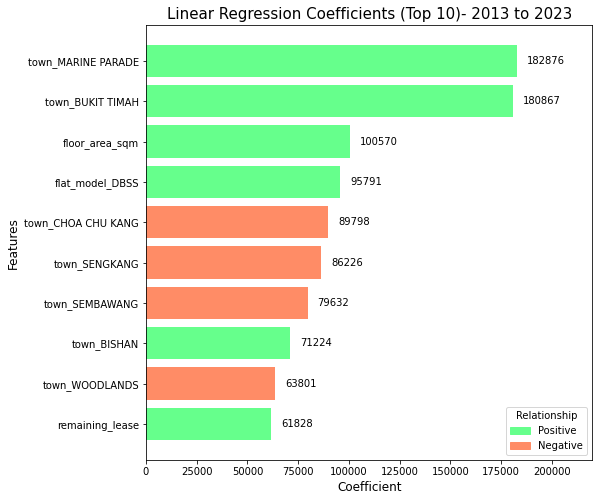

In [48]:
fig, ax = plt.subplots(figsize=(8,8))
lr_importance_graph = lr_importance.head(10)
graph = ax.barh(lr_importance_graph['Features'], lr_importance_graph['Coeff_ABS'],
                color=lr_importance_graph['color'])


colors = {'Positive':'#66ff8c', 'Negative':'#ff8c66'}       
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Relationship',loc='lower right', fontsize ='10')

plt.title('Linear Regression Coefficients (Top 10)- 2013 to 2023', size = 15)
plt.ylabel('Features', size = 12)
plt.xlabel('Coefficient', size = 12)
ax.bar_label(graph, fmt='%.0f', padding =10)
ax.set_xlim(right=220000) 
ax.invert_yaxis()

plt.show()

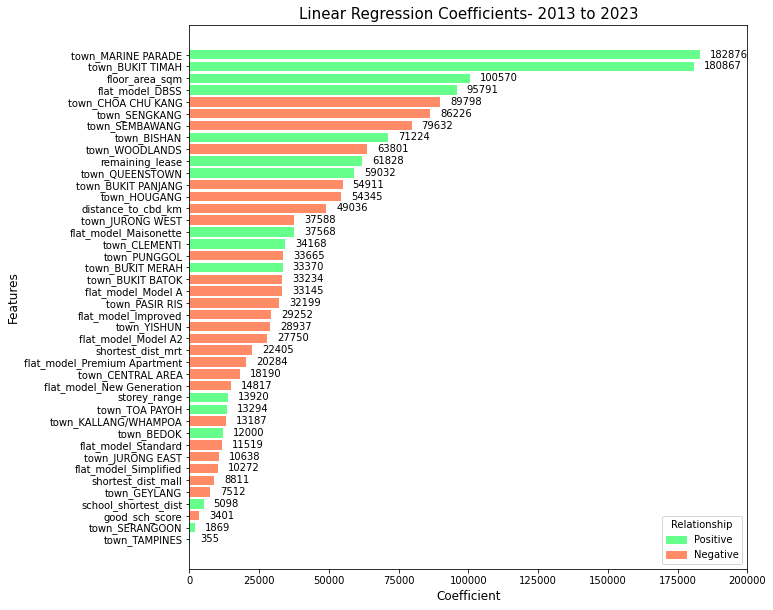

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
graph = ax.barh(lr_importance['Features'], lr_importance['Coeff_ABS'],
                color=lr_importance['color'])


colors = {'Positive':'#66ff8c', 'Negative':'#ff8c66'}       
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Relationship',loc='lower right', fontsize ='10')

plt.title('Linear Regression Coefficients- 2013 to 2023', size = 15)
plt.ylabel('Features', size = 12)
plt.xlabel('Coefficient', size = 12)
ax.bar_label(graph, fmt='%.0f', padding =10)
ax.set_xlim(right=200000) 
ax.invert_yaxis()

plt.show()

#### 2. Random Forest 

Computing the baseline model

In [51]:
rf = RandomForestRegressor(random_state = 100)
rf_r2, rf_mae, rf_rmse = model_performance(rf, X_train, X_test, y_train, y_test)

R^2 score = 0.9648398678215069
MAE: 20192.897304058253
RMSE 27991.348871304246


Training a baseline random forest model takes about 6-7 minutes.

In [53]:
rf_importance = pd.DataFrame(list(zip(rf.feature_names_in_, rf.feature_importances_)), columns =['Features', 'Coeff'])
rf_importance = rf_importance.sort_values(by = 'Coeff', ascending = False).reset_index(drop =True)
rf_importance

Features     Coeff
0                 floor_area_sqm  0.496788
1             distance_to_cbd_km  0.239694
2                remaining_lease  0.117988
3                   storey_range  0.040960
4              shortest_dist_mrt  0.026672
5             shortest_dist_mall  0.020307
6           school_shortest_dist  0.009732
7                flat_model_DBSS  0.008401
8                 good_sch_score  0.004227
9               town_BUKIT TIMAH  0.003881
10            flat_model_Model A  0.003815
11           flat_model_Improved  0.002632
12                 town_TAMPINES  0.002521
13                  town_HOUGANG  0.002267
14                 town_CLEMENTI  0.001995
15                   town_BISHAN  0.001864
16              town_JURONG WEST  0.001468
17            town_BUKIT PANJANG  0.001261
18  flat_model_Premium Apartment  0.001193
19                  town_PUNGGOL  0.001174
20                 town_SENGKANG  0.001156
21                    town_BEDOK  0.000914
22                town_PASIR RIS  0.000871
23              town_JURONG EAST  0.000833
24              town_BUKIT BATOK  0.000828
25              town_BUKIT MERAH  0.000823
26                  town_GEYLANG  0.000810
27               town_QUEENSTOWN  0.000807
28            town_MARINE PARADE  0.000720
29          town_KALLANG/WHAMPOA  0.000506
30            town_CHOA CHU KANG  0.000459
31     flat_model_New Generation  0.000366
32                   town_YISHUN  0.000316
33         flat_model_Maisonette  0.000307
34                town_SERANGOON  0.000272
35                town_TOA PAYOH  0.000251
36                town_WOODLANDS  0.000227
37         flat_model_Simplified  0.000202
38             town_CENTRAL AREA  0.000193
39           flat_model_Standard  0.000153
40                town_SEMBAWANG  0.000100
41           flat_model_Model A2  0.000048

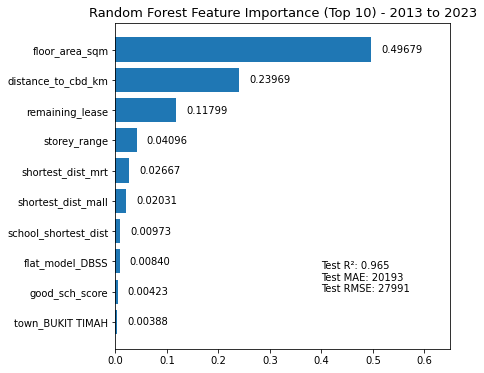

In [58]:
fig, ax = plt.subplots(figsize=(6,6))
rf_importance_graph = rf_importance.head(10)
graph = ax.barh(rf_importance_graph['Features'], rf_importance_graph['Coeff'])
plt.title('Random Forest Feature Importance (Top 10) - 2013 to 2023', size = 13)
plt.annotate(('Test R\u00b2: ' + str(round(rf_r2,3)) + '\nTest MAE: ' + str(round(rf_mae))+
             '\nTest RMSE: ' + str(round(rf_rmse))),
             xy=(0.4,8), fontsize = 10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.bar_label(graph, fmt='%.5f', padding =10)
ax.set_xlim(right=0.65) 
ax.invert_yaxis()


plt.show()

#### Hyperparameter tuning using RandomizedSearchCV

In [72]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [73]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf1 = RandomForestRegressor(random_state = 100)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=2, random_state=100)
# Fit the random search model
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 4.6min
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 6.0min
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time= 6.5min


c:\Users\raych\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
y_pred = rf_random.predict(X_test)

rf_random_r2 = r2_score(y_test, y_pred)
rf_random_mae = mean_absolute_error(y_test, y_pred)
rf_random_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R^2 score =', rf_random_r2)
print('MAE:', rf_random_mae)
print('RMSE', rf_random_rmse)
    

R^2 score = 0.9641498578160037
MAE: 20321.9823770637
RMSE 28284.347038749045


In [56]:
rf_random_importance = pd.DataFrame(list(zip(rf_random.feature_names_in_, rf_random.best_estimator_.feature_importances_)),
                                    columns =['Features', 'Coeff'])
rf_random_importance = rf_random_importance.sort_values(by = 'Coeff', ascending = False).reset_index(drop =True)
rf_random_importance

Features     Coeff
0                 floor_area_sqm  0.498620
1             distance_to_cbd_km  0.246664
2                remaining_lease  0.111466
3                   storey_range  0.040884
4              shortest_dist_mrt  0.025590
5             shortest_dist_mall  0.017852
6                flat_model_DBSS  0.008522
7           school_shortest_dist  0.008298
8             flat_model_Model A  0.005222
9               town_BUKIT TIMAH  0.004185
10                good_sch_score  0.003942
11           flat_model_Improved  0.003249
12                 town_TAMPINES  0.002798
13                   town_BISHAN  0.002433
14                  town_HOUGANG  0.002238
15                 town_CLEMENTI  0.001877
16              town_JURONG WEST  0.001713
17                 town_SENGKANG  0.001330
18                  town_PUNGGOL  0.001210
19            town_BUKIT PANJANG  0.001195
20  flat_model_Premium Apartment  0.001036
21                town_PASIR RIS  0.000917
22                    town_BEDOK  0.000888
23              town_BUKIT BATOK  0.000829
24            town_MARINE PARADE  0.000827
25              town_BUKIT MERAH  0.000800
26              town_JURONG EAST  0.000756
27               town_QUEENSTOWN  0.000726
28                  town_GEYLANG  0.000691
29          town_KALLANG/WHAMPOA  0.000437
30            town_CHOA CHU KANG  0.000399
31     flat_model_New Generation  0.000327
32                   town_YISHUN  0.000311
33                town_TOA PAYOH  0.000247
34         flat_model_Maisonette  0.000247
35           flat_model_Standard  0.000243
36         flat_model_Simplified  0.000227
37             town_CENTRAL AREA  0.000215
38                town_SERANGOON  0.000210
39                town_WOODLANDS  0.000204
40                town_SEMBAWANG  0.000088
41           flat_model_Model A2  0.000087

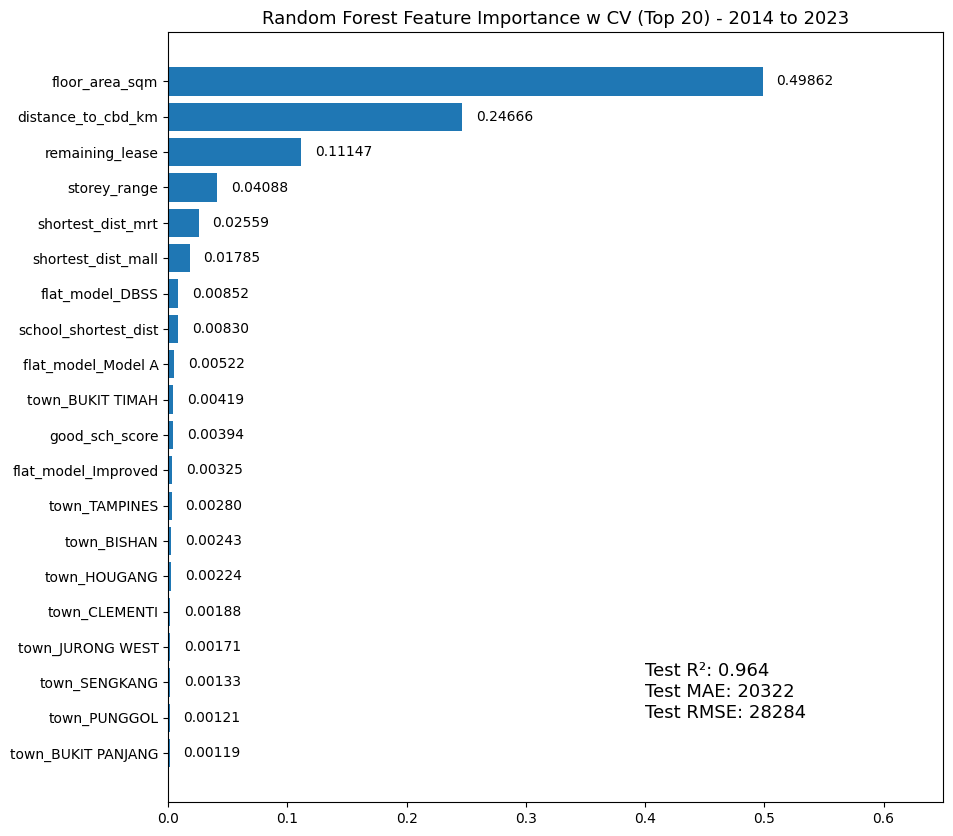

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
rf_random_importance_graph = rf_random_importance.head(20)
graph = ax.barh(rf_random_importance_graph['Features'], rf_random_importance_graph['Coeff'])
plt.title('Random Forest Feature Importance w CV (Top 20) - 2013 to 2023', size = 13)
plt.annotate(('Test R\u00b2: ' + str(round(rf_random_r2,3)) + '\nTest MAE: ' + str(round(rf_random_mae))+
             '\nTest RMSE: ' + str(round(rf_random_rmse))),
             xy=(0.4,18), fontsize = 13)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.bar_label(graph, fmt='%.5f', padding =10)
ax.set_xlim(right=0.65) 
ax.invert_yaxis()


plt.show()

#### Out-of-Bag

In [55]:
oob_model = RandomForestRegressor(oob_score=True, random_state = 100)
oob_r2, oob_mae, oob_rmse = model_performance(oob_model, X_train, X_test, y_train, y_test)

R^2 score = 0.9648398678215069
MAE: 20192.897304058253
RMSE 27991.348871304246


In [56]:
oob_model.oob_score_

0.9636860036453673

In [57]:
oob_importance = pd.DataFrame(list(zip(oob_model.feature_names_in_, oob_model.feature_importances_)), columns =['Features', 'Coeff'])
oob_importance = oob_importance.sort_values(by = 'Coeff', ascending = False).reset_index(drop =True)
oob_importance

Features     Coeff
0                 floor_area_sqm  0.496788
1             distance_to_cbd_km  0.239694
2                remaining_lease  0.117988
3                   storey_range  0.040960
4              shortest_dist_mrt  0.026672
5             shortest_dist_mall  0.020307
6           school_shortest_dist  0.009732
7                flat_model_DBSS  0.008401
8                 good_sch_score  0.004227
9               town_BUKIT TIMAH  0.003881
10            flat_model_Model A  0.003815
11           flat_model_Improved  0.002632
12                 town_TAMPINES  0.002521
13                  town_HOUGANG  0.002267
14                 town_CLEMENTI  0.001995
15                   town_BISHAN  0.001864
16              town_JURONG WEST  0.001468
17            town_BUKIT PANJANG  0.001261
18  flat_model_Premium Apartment  0.001193
19                  town_PUNGGOL  0.001174
20                 town_SENGKANG  0.001156
21                    town_BEDOK  0.000914
22                town_PASIR RIS  0.000871
23              town_JURONG EAST  0.000833
24              town_BUKIT BATOK  0.000828
25              town_BUKIT MERAH  0.000823
26                  town_GEYLANG  0.000810
27               town_QUEENSTOWN  0.000807
28            town_MARINE PARADE  0.000720
29          town_KALLANG/WHAMPOA  0.000506
30            town_CHOA CHU KANG  0.000459
31     flat_model_New Generation  0.000366
32                   town_YISHUN  0.000316
33         flat_model_Maisonette  0.000307
34                town_SERANGOON  0.000272
35                town_TOA PAYOH  0.000251
36                town_WOODLANDS  0.000227
37         flat_model_Simplified  0.000202
38             town_CENTRAL AREA  0.000193
39           flat_model_Standard  0.000153
40                town_SEMBAWANG  0.000100
41           flat_model_Model A2  0.000048

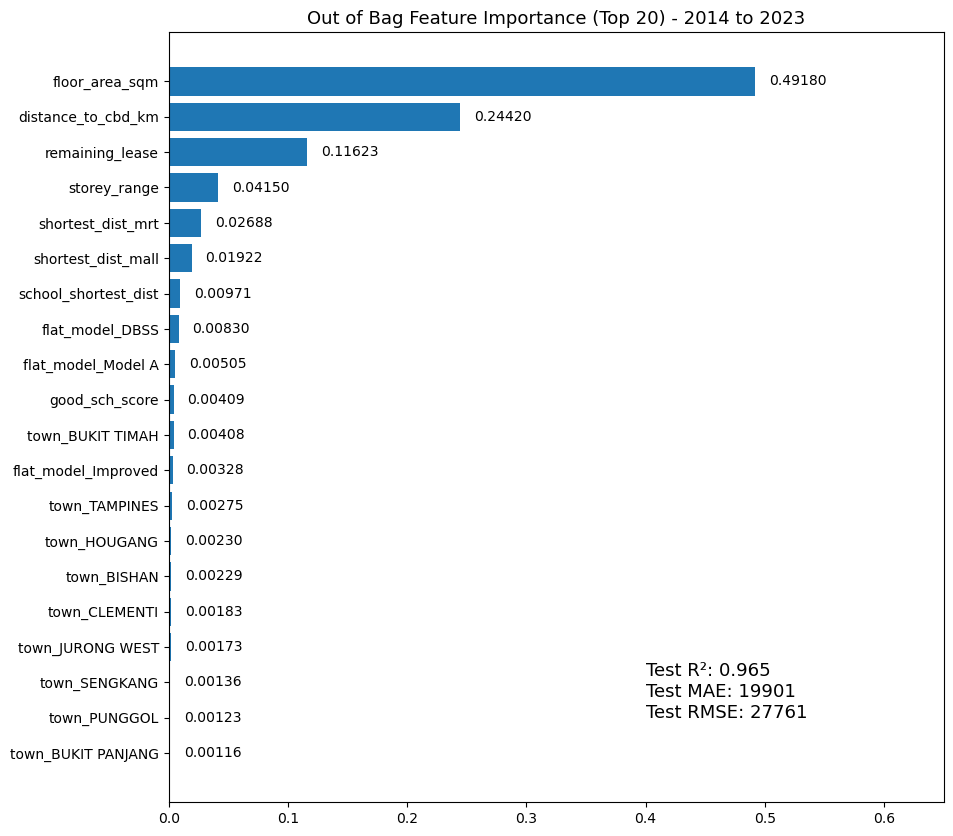

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
oob_importance_graph = oob_importance.head(20)
graph = ax.barh(oob_importance_graph['Features'], oob_importance_graph['Coeff'])
plt.title('Out of Bag Feature Importance (Top 20) - 2013 to 2023', size = 13)
plt.annotate(('Test R\u00b2: ' + str(round(oob_r2,3)) + '\nTest MAE: ' + str(round(oob_mae))+
             '\nTest RMSE: ' + str(round(oob_rmse))),
             xy=(0.4,18), fontsize = 13)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.bar_label(graph, fmt='%.5f', padding =10)
ax.set_xlim(right=0.65) 
ax.invert_yaxis()


plt.show()

#### XGBoost

In [59]:
xgb = XGBRegressor(random_state = 100)
xgb_r2, xgb_mae, xgb_rmse = model_performance(xgb, X_train, X_test, y_train, y_test)

R^2 score = 0.9474017089857787
MAE: 26021.296829411407
RMSE 34236.10852667363


In [60]:
xgb_importance = pd.DataFrame(list(zip(X_train.columns, xgb.feature_importances_)), columns =['Features', 'Coeff'])
xgb_importance = xgb_importance.sort_values(by = 'Coeff', ascending = False).reset_index(drop =True)
xgb_importance

Features     Coeff
0                 floor_area_sqm  0.152956
1      flat_model_New Generation  0.124490
2             distance_to_cbd_km  0.094415
3                flat_model_DBSS  0.077454
4               town_BUKIT TIMAH  0.062785
5                    town_BISHAN  0.040337
6                   town_HOUGANG  0.039884
7                  town_CLEMENTI  0.034776
8                  town_TAMPINES  0.032404
9             town_MARINE PARADE  0.029710
10                  storey_range  0.029125
11            flat_model_Model A  0.021334
12                  town_PUNGGOL  0.018742
13              town_BUKIT MERAH  0.018397
14               remaining_lease  0.018202
15              town_JURONG EAST  0.015699
16                 town_SENGKANG  0.013202
17             shortest_dist_mrt  0.013138
18              town_JURONG WEST  0.012497
19              town_BUKIT BATOK  0.011652
20            town_BUKIT PANJANG  0.011232
21               town_QUEENSTOWN  0.011013
22                town_SERANGOON  0.010040
23                  town_GEYLANG  0.009094
24            town_CHOA CHU KANG  0.008909
25           flat_model_Model A2  0.008478
26                    town_BEDOK  0.007518
27            shortest_dist_mall  0.007339
28                town_PASIR RIS  0.007315
29  flat_model_Premium Apartment  0.006772
30                   town_YISHUN  0.006349
31                town_TOA PAYOH  0.006226
32             town_CENTRAL AREA  0.005686
33                good_sch_score  0.005535
34           flat_model_Improved  0.005306
35                town_SEMBAWANG  0.004508
36          town_KALLANG/WHAMPOA  0.003907
37           flat_model_Standard  0.003886
38         flat_model_Simplified  0.003183
39          school_shortest_dist  0.002439
40                town_WOODLANDS  0.002157
41         flat_model_Maisonette  0.001907

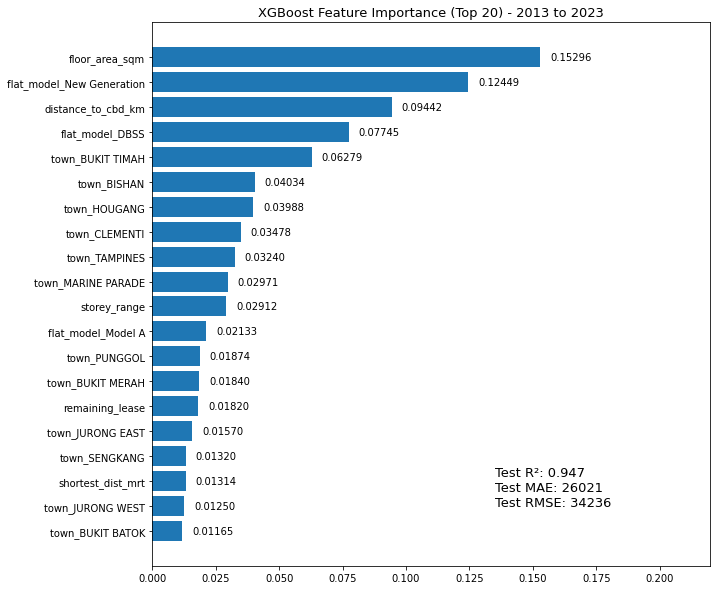

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
xgb_importance_graph = xgb_importance.head(20)
graph = ax.barh(xgb_importance_graph['Features'], xgb_importance_graph['Coeff'])
plt.title('XGBoost Feature Importance (Top 20) - 2013 to 2023', size = 13)
plt.annotate(('Test R\u00b2: ' + str(round(xgb_r2,3)) + '\nTest MAE: ' + str(round(xgb_mae))+
             '\nTest RMSE: ' + str(round(xgb_rmse))),
             xy=(0.135,18), fontsize = 13)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.bar_label(graph, fmt='%.5f', padding =10)
ax.set_xlim(right=0.22) 
ax.invert_yaxis()


plt.show()

## Other Analysis

#### swap good_sch_score with good_sch_score_SAP_GEP

In [63]:
dropped_features_2 = ['mrt_count_within_1km','mall_count_within_1km',
                    'matured','good_sch_count_within_1km','flat_type','good_sch_score',
                    'year']

df_2 = data.drop(columns = dropped_features_2)

# Split target variable from dataset
y_2= df_2['adjusted_price']
X_2 = df_2.drop(columns='adjusted_price')

X2_train,X2_test,y2_train,y2_test=train_test_split(X_2,y_2,test_size=0.2,random_state=100)

# Scale dataset
continuous_features = ['floor_area_sqm', 'remaining_lease','shortest_dist_mrt',
                 'shortest_dist_mall', 'school_shortest_dist', 'distance_to_cbd_km']

scaler = StandardScaler()
X2_train_continuous = X2_train[continuous_features]
X2_train_continuous = scaler.fit_transform(X2_train_continuous)

X2_test_continuous = X2_test[continuous_features]
X2_test_continuous = scaler.transform(X2_test_continuous)

# Replace original continuous features with scaled ones in X

X2_train[continuous_features] = X2_train_continuous
X2_test[continuous_features] = X2_test_continuous

In [64]:
lr2 = LinearRegression()
lin_reg_2_r2, lin_reg_2_mae, lin_reg_2_rmse = model_performance(lr2, X2_train, X2_test, y2_train, y2_test)

R^2 score = 0.8468257881373729
MAE: 46001.168146369855
RMSE 58424.015762086485


In [50]:
lr_2_importance = pd.DataFrame(list(zip(lr2.feature_names_in_, lr2.coef_)), columns =['Features', 'Coeff'])
lr_2_importance = lr_2_importance.sort_values(by = 'Coeff', ascending = False).reset_index(drop =True)
lr_2_importance

Features          Coeff
0             town_MARINE PARADE  180559.685439
1               town_BUKIT TIMAH  172260.109590
2                 floor_area_sqm  101163.786164
3                flat_model_DBSS   96392.406467
4                    town_BISHAN   66222.003068
5                remaining_lease   62379.280902
6                town_QUEENSTOWN   57554.300906
7          flat_model_Maisonette   37787.053763
8               town_BUKIT MERAH   34885.110961
9                  town_CLEMENTI   29971.824165
10                  storey_range   14074.526464
11                    town_BEDOK   10422.200086
12                town_TOA PAYOH    9374.820768
13          school_shortest_dist    5578.299926
14        good_sch_score_sap_gep    1165.568196
15                town_SERANGOON     235.824063
16                 town_TAMPINES   -3249.194358
17            shortest_dist_mall   -9734.985256
18         flat_model_Simplified  -10529.464756
19              town_JURONG EAST  -10684.563223
20                  town_GEYLANG  -11546.867920
21           flat_model_Standard  -14021.056507
22          town_KALLANG/WHAMPOA  -14446.040576
23     flat_model_New Generation  -18469.235664
24             town_CENTRAL AREA  -20317.722650
25  flat_model_Premium Apartment  -20651.830504
26             shortest_dist_mrt  -23269.491895
27           flat_model_Model A2  -29110.214431
28                   town_YISHUN  -30341.511250
29           flat_model_Improved  -30572.832746
30                town_PASIR RIS  -31946.388680
31            flat_model_Model A  -33277.231920
32                  town_PUNGGOL  -33358.040305
33              town_BUKIT BATOK  -34476.244802
34              town_JURONG WEST  -39008.384206
35            distance_to_cbd_km  -48683.240896
36            town_BUKIT PANJANG  -58715.832864
37                  town_HOUGANG  -61281.877000
38                town_WOODLANDS  -65884.191569
39                town_SEMBAWANG  -81955.302185
40                 town_SENGKANG  -87261.418942
41            town_CHOA CHU KANG  -92325.547371

In [51]:
X2_constant = sm.add_constant(X2_train)
lr_ols = sm.OLS(y2_train,X2_constant).fit()
print(lr_ols.summary())

                            OLS Regression Results                            
Dep. Variable:         adjusted_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 2.124e+04
Date:                Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:33:27   Log-Likelihood:            -1.9693e+06
No. Observations:              158905   AIC:                         3.939e+06
Df Residuals:                  158862   BIC:                         3.939e+06
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [52]:
lr_2_importance['Coeff_ABS'] = np.abs(lr_2_importance['Coeff'])
lr_2_importance = lr_2_importance.sort_values('Coeff_ABS', ascending = False).reset_index(drop= True)
lr_2_importance['color'] = lr_2_importance['Coeff'].apply(lambda x: '#66ff8c' if x>0 else '#ff8c66')
lr_2_importance

Features          Coeff      Coeff_ABS    color
0             town_MARINE PARADE  180559.685439  180559.685439  #66ff8c
1               town_BUKIT TIMAH  172260.109590  172260.109590  #66ff8c
2                 floor_area_sqm  101163.786164  101163.786164  #66ff8c
3                flat_model_DBSS   96392.406467   96392.406467  #66ff8c
4             town_CHOA CHU KANG  -92325.547371   92325.547371  #ff8c66
5                  town_SENGKANG  -87261.418942   87261.418942  #ff8c66
6                 town_SEMBAWANG  -81955.302185   81955.302185  #ff8c66
7                    town_BISHAN   66222.003068   66222.003068  #66ff8c
8                 town_WOODLANDS  -65884.191569   65884.191569  #ff8c66
9                remaining_lease   62379.280902   62379.280902  #66ff8c
10                  town_HOUGANG  -61281.877000   61281.877000  #ff8c66
11            town_BUKIT PANJANG  -58715.832864   58715.832864  #ff8c66
12               town_QUEENSTOWN   57554.300906   57554.300906  #66ff8c
13            distance_to_cbd_km  -48683.240896   48683.240896  #ff8c66
14              town_JURONG WEST  -39008.384206   39008.384206  #ff8c66
15         flat_model_Maisonette   37787.053763   37787.053763  #66ff8c
16              town_BUKIT MERAH   34885.110961   34885.110961  #66ff8c
17              town_BUKIT BATOK  -34476.244802   34476.244802  #ff8c66
18                  town_PUNGGOL  -33358.040305   33358.040305  #ff8c66
19            flat_model_Model A  -33277.231920   33277.231920  #ff8c66
20                town_PASIR RIS  -31946.388680   31946.388680  #ff8c66
21           flat_model_Improved  -30572.832746   30572.832746  #ff8c66
22                   town_YISHUN  -30341.511250   30341.511250  #ff8c66
23                 town_CLEMENTI   29971.824165   29971.824165  #66ff8c
24           flat_model_Model A2  -29110.214431   29110.214431  #ff8c66
25             shortest_dist_mrt  -23269.491895   23269.491895  #ff8c66
26  flat_model_Premium Apartment  -20651.830504   20651.830504  #ff8c66
27             town_CENTRAL AREA  -20317.722650   20317.722650  #ff8c66
28     flat_model_New Generation  -18469.235664   18469.235664  #ff8c66
29          town_KALLANG/WHAMPOA  -14446.040576   14446.040576  #ff8c66
30                  storey_range   14074.526464   14074.526464  #66ff8c
31           flat_model_Standard  -14021.056507   14021.056507  #ff8c66
32                  town_GEYLANG  -11546.867920   11546.867920  #ff8c66
33              town_JURONG EAST  -10684.563223   10684.563223  #ff8c66
34         flat_model_Simplified  -10529.464756   10529.464756  #ff8c66
35                    town_BEDOK   10422.200086   10422.200086  #66ff8c
36            shortest_dist_mall   -9734.985256    9734.985256  #ff8c66
37                town_TOA PAYOH    9374.820768    9374.820768  #66ff8c
38          school_shortest_dist    5578.299926    5578.299926  #66ff8c
39                 town_TAMPINES   -3249.194358    3249.194358  #ff8c66
40        good_sch_score_sap_gep    1165.568196    1165.568196  #66ff8c
41                town_SERANGOON     235.824063     235.824063  #66ff8c

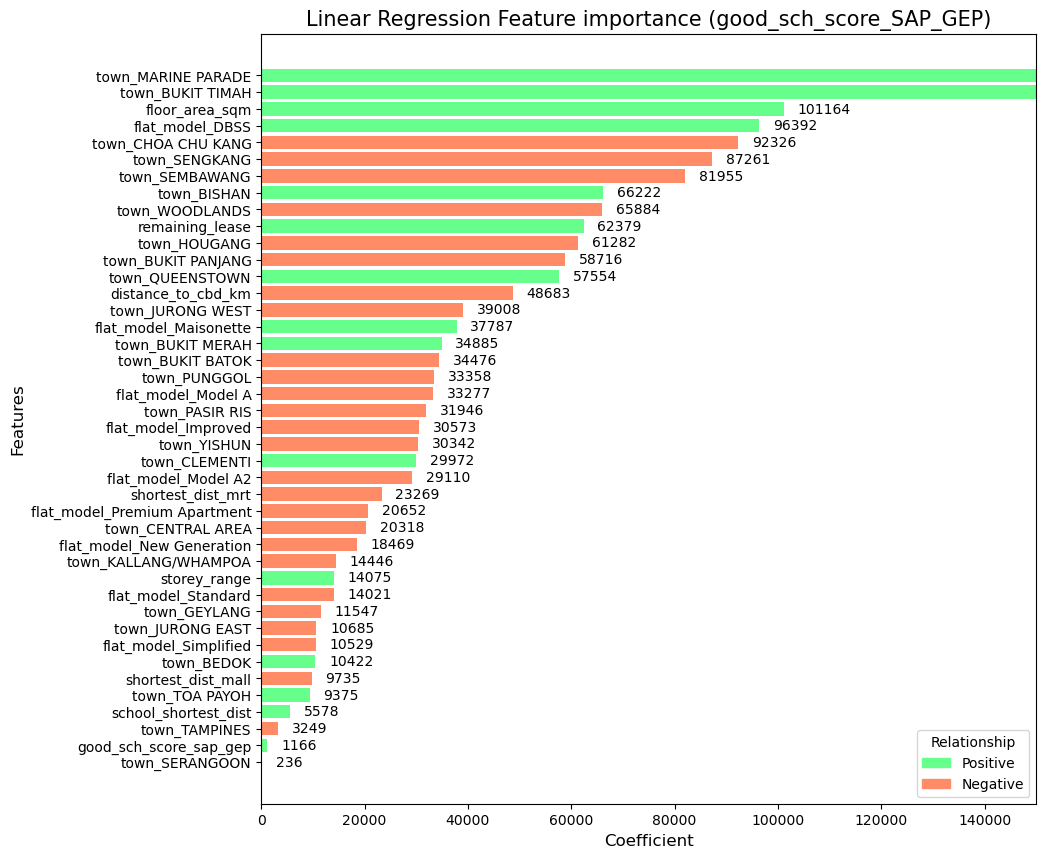

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
graph = ax.barh(lr_2_importance['Features'], lr_2_importance['Coeff_ABS'],
                color=lr_2_importance['color'])


colors = {'Positive':'#66ff8c', 'Negative':'#ff8c66'}       
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Relationship',loc='lower right', fontsize ='10')

plt.title('Linear Regression Feature importance (good_sch_score_SAP_GEP)', size = 15)
plt.ylabel('Features', size = 12)
plt.xlabel('Coefficient', size = 12)
ax.bar_label(graph, fmt='%.0f', padding =10)
ax.set_xlim(right=150000) 
ax.invert_yaxis()

plt.show()

In [54]:
rf_2 = RandomForestRegressor(random_state = 100)
rf_2_r2, rf_2_mae, rf_2_rmse = model_performance(rf_2, X2_train, X2_test, y2_train, y2_test)

rf_2_importance = pd.DataFrame(list(zip(rf_2.feature_names_in_, rf_2.feature_importances_)), columns =['Features', 'Coeff'])
rf_2_importance = rf_2_importance.sort_values(by = 'Coeff', ascending = False).reset_index(drop =True)
rf_2_importance

R^2 score = 0.9654625455113067
MAE: 19907.447739693638
RMSE 27761.688623186787


Features     Coeff
0                 floor_area_sqm  0.492021
1             distance_to_cbd_km  0.244590
2                remaining_lease  0.116498
3                   storey_range  0.040999
4              shortest_dist_mrt  0.027000
5             shortest_dist_mall  0.019661
6           school_shortest_dist  0.009687
7                flat_model_DBSS  0.008312
8             flat_model_Model A  0.004973
9               town_BUKIT TIMAH  0.004021
10        good_sch_score_sap_gep  0.003456
11           flat_model_Improved  0.003264
12                 town_TAMPINES  0.002669
13                  town_HOUGANG  0.002394
14                   town_BISHAN  0.002073
15              town_JURONG WEST  0.001733
16                 town_CLEMENTI  0.001713
17                 town_SENGKANG  0.001387
18                  town_PUNGGOL  0.001247
19            town_BUKIT PANJANG  0.001161
20  flat_model_Premium Apartment  0.000997
21                town_PASIR RIS  0.000920
22                    town_BEDOK  0.000885
23                  town_GEYLANG  0.000858
24              town_BUKIT BATOK  0.000854
25              town_BUKIT MERAH  0.000834
26            town_MARINE PARADE  0.000823
27               town_QUEENSTOWN  0.000770
28              town_JURONG EAST  0.000734
29          town_KALLANG/WHAMPOA  0.000440
30            town_CHOA CHU KANG  0.000436
31     flat_model_New Generation  0.000360
32                   town_YISHUN  0.000323
33         flat_model_Maisonette  0.000305
34           flat_model_Standard  0.000292
35                town_TOA PAYOH  0.000257
36                town_WOODLANDS  0.000227
37         flat_model_Simplified  0.000226
38             town_CENTRAL AREA  0.000211
39                town_SERANGOON  0.000201
40                town_SEMBAWANG  0.000103
41           flat_model_Model A2  0.000086

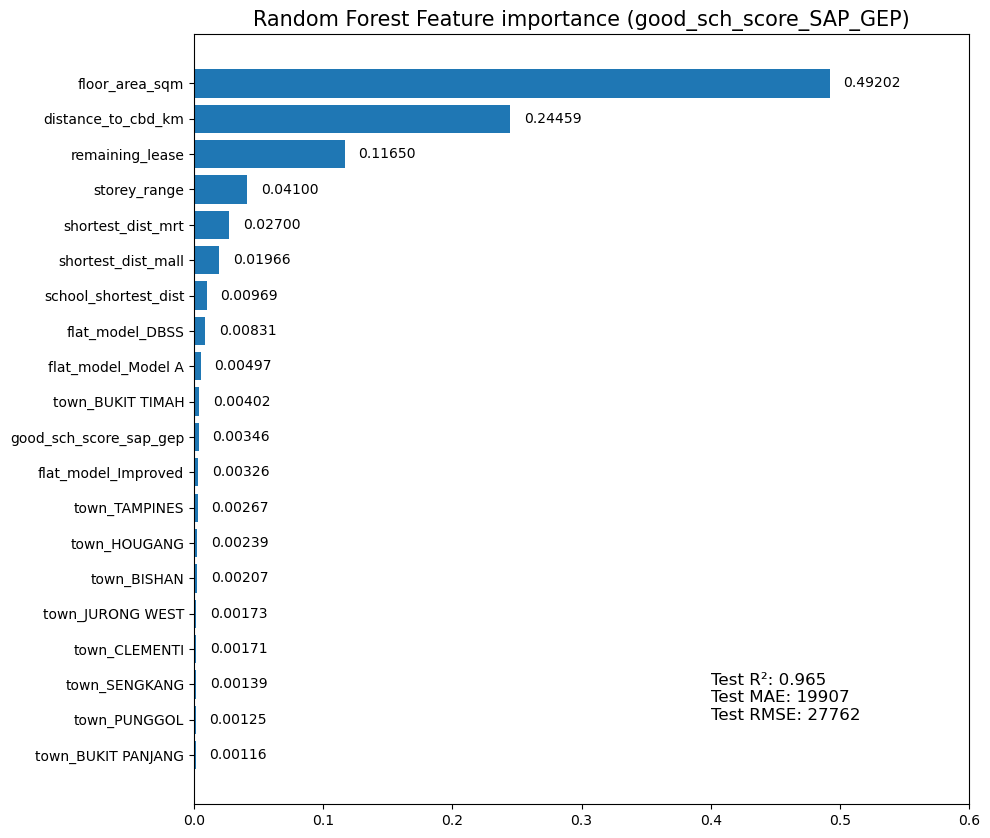

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
rf_2_importance_graph = rf_2_importance.head(20)
graph = ax.barh(rf_2_importance_graph['Features'], rf_2_importance_graph['Coeff'])
plt.title('Random Forest Feature importance (good_sch_score_SAP_GEP)', size = 15)
plt.annotate(('Test R\u00b2: ' + str(round(rf_2_r2,3)) + '\nTest MAE: ' + str(round(rf_2_mae))+
             '\nTest RMSE: ' + str(round(rf_2_rmse))),
             xy=(0.4,18), fontsize = 12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.bar_label(graph, fmt='%.5f', padding =10)
ax.set_xlim(right=0.6) 
ax.invert_yaxis()


plt.show()

#### What if we remove floor_area_sqm, distance_to_cbd_km, and remaining_lease from the feature list?

In [65]:
dropped_features_2 = ['mrt_count_within_1km','mall_count_within_1km',
                    'matured','good_sch_count_within_1km','floor_area_sqm','flat_type',
                    'good_sch_score', 'year', 'distance_to_cbd_km', 'remaining_lease']

df_2 = data.drop(columns = dropped_features_2)

# Split target variable from dataset
y_2= df_2['adjusted_price']
X_2 = df_2.drop(columns='adjusted_price')

X2_train,X2_test,y2_train,y2_test=train_test_split(X_2,y_2,test_size=0.2,random_state=100)

# Scale dataset
continuous_features = ['shortest_dist_mrt',
                 'shortest_dist_mall', 'school_shortest_dist']

scaler = StandardScaler()
X2_train_continuous = X2_train[continuous_features]
X2_train_continuous = scaler.fit_transform(X2_train_continuous)

X2_test_continuous = X2_test[continuous_features]
X2_test_continuous = scaler.transform(X2_test_continuous)

# Replace original continuous features with scaled ones in X

X2_train[continuous_features] = X2_train_continuous
X2_test[continuous_features] = X2_test_continuous

In [66]:
lr3 = LinearRegression()
lin_reg_3_r2, lin_reg_3_mae, lin_reg_3_rmse = model_performance(lr3, X2_train, X2_test, y2_train, y2_test)

lr3_importance = pd.DataFrame(list(zip(lr3.feature_names_in_, lr3.coef_)), columns =['Features', 'Coeff'])
lr3_importance.sort_values(by = 'Coeff', ascending = False)

R^2 score = 0.5189909682843437
MAE: 78505.61840751792
RMSE 103532.14051944068


Features          Coeff
10              town_BUKIT TIMAH  160246.541525
6                    town_BISHAN  120322.238742
19            town_MARINE PARADE  103211.609514
8               town_BUKIT MERAH   78841.387845
32         flat_model_Maisonette   45504.043389
25                town_SERANGOON   31814.260142
22               town_QUEENSTOWN   28962.004743
13                 town_CLEMENTI   23730.519842
0                   storey_range   21719.818110
4         good_sch_score_sap_gep    3908.884211
30               flat_model_DBSS    3498.705413
3           school_shortest_dist    1400.129841
18          town_KALLANG/WHAMPOA   -2299.867659
5                     town_BEDOK   -7330.595225
2             shortest_dist_mall   -8760.642504
20                town_PASIR RIS  -13105.636339
26                 town_TAMPINES  -15267.153911
1              shortest_dist_mrt  -22156.036553
21                  town_PUNGGOL  -22973.947558
14                  town_GEYLANG  -23902.851483
16              town_JURONG EAST  -30402.426937
27                town_TOA PAYOH  -30615.310208
15                  town_HOUGANG  -36032.332666
24                 town_SENGKANG  -57485.900833
7               town_BUKIT BATOK  -61726.696238
9             town_BUKIT PANJANG  -62976.919705
29                   town_YISHUN  -66774.743612
11             town_CENTRAL AREA  -75833.892388
12            town_CHOA CHU KANG  -93253.350526
28                town_WOODLANDS  -94331.864853
17              town_JURONG WEST  -97552.827875
23                town_SEMBAWANG -114511.421800
36  flat_model_Premium Apartment -148523.052135
31           flat_model_Improved -195578.048569
33            flat_model_Model A -209345.145233
34           flat_model_Model A2 -242595.430405
37         flat_model_Simplified -289924.945252
38           flat_model_Standard -297104.431044
35     flat_model_New Generation -313787.153975

In [67]:
lr3_importance['Coeff_ABS'] = np.abs(lr3_importance['Coeff'])
lr3_importance = lr3_importance.sort_values('Coeff_ABS', ascending = False).reset_index(drop= True)
lr3_importance['color'] = lr3_importance['Coeff'].apply(lambda x: '#66ff8c' if x>0 else '#ff8c66')
lr3_importance

Features          Coeff      Coeff_ABS    color
0      flat_model_New Generation -313787.153975  313787.153975  #ff8c66
1            flat_model_Standard -297104.431044  297104.431044  #ff8c66
2          flat_model_Simplified -289924.945252  289924.945252  #ff8c66
3            flat_model_Model A2 -242595.430405  242595.430405  #ff8c66
4             flat_model_Model A -209345.145233  209345.145233  #ff8c66
5            flat_model_Improved -195578.048569  195578.048569  #ff8c66
6               town_BUKIT TIMAH  160246.541525  160246.541525  #66ff8c
7   flat_model_Premium Apartment -148523.052135  148523.052135  #ff8c66
8                    town_BISHAN  120322.238742  120322.238742  #66ff8c
9                 town_SEMBAWANG -114511.421800  114511.421800  #ff8c66
10            town_MARINE PARADE  103211.609514  103211.609514  #66ff8c
11              town_JURONG WEST  -97552.827875   97552.827875  #ff8c66
12                town_WOODLANDS  -94331.864853   94331.864853  #ff8c66
13            town_CHOA CHU KANG  -93253.350526   93253.350526  #ff8c66
14              town_BUKIT MERAH   78841.387845   78841.387845  #66ff8c
15             town_CENTRAL AREA  -75833.892388   75833.892388  #ff8c66
16                   town_YISHUN  -66774.743612   66774.743612  #ff8c66
17            town_BUKIT PANJANG  -62976.919705   62976.919705  #ff8c66
18              town_BUKIT BATOK  -61726.696238   61726.696238  #ff8c66
19                 town_SENGKANG  -57485.900833   57485.900833  #ff8c66
20         flat_model_Maisonette   45504.043389   45504.043389  #66ff8c
21                  town_HOUGANG  -36032.332666   36032.332666  #ff8c66
22                town_SERANGOON   31814.260142   31814.260142  #66ff8c
23                town_TOA PAYOH  -30615.310208   30615.310208  #ff8c66
24              town_JURONG EAST  -30402.426937   30402.426937  #ff8c66
25               town_QUEENSTOWN   28962.004743   28962.004743  #66ff8c
26                  town_GEYLANG  -23902.851483   23902.851483  #ff8c66
27                 town_CLEMENTI   23730.519842   23730.519842  #66ff8c
28                  town_PUNGGOL  -22973.947558   22973.947558  #ff8c66
29             shortest_dist_mrt  -22156.036553   22156.036553  #ff8c66
30                  storey_range   21719.818110   21719.818110  #66ff8c
31                 town_TAMPINES  -15267.153911   15267.153911  #ff8c66
32                town_PASIR RIS  -13105.636339   13105.636339  #ff8c66
33            shortest_dist_mall   -8760.642504    8760.642504  #ff8c66
34                    town_BEDOK   -7330.595225    7330.595225  #ff8c66
35        good_sch_score_sap_gep    3908.884211    3908.884211  #66ff8c
36               flat_model_DBSS    3498.705413    3498.705413  #66ff8c
37          town_KALLANG/WHAMPOA   -2299.867659    2299.867659  #ff8c66
38          school_shortest_dist    1400.129841    1400.129841  #66ff8c

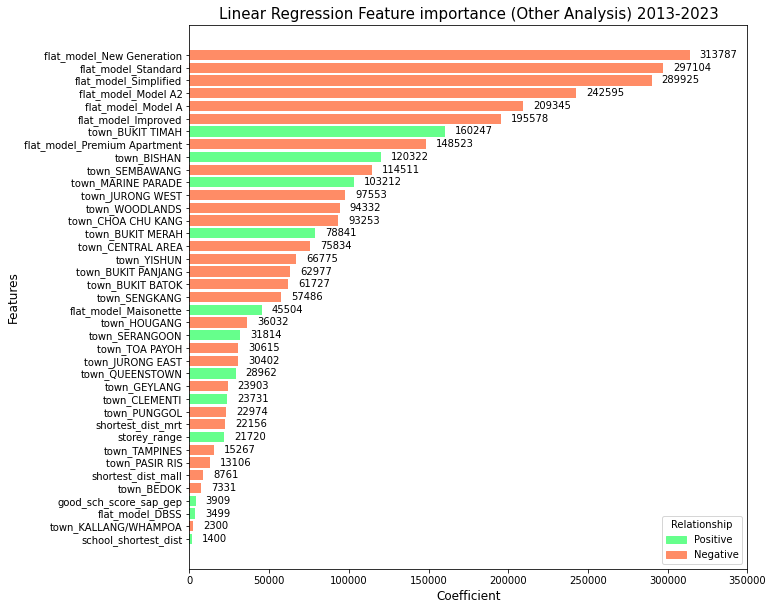

In [68]:
fig, ax = plt.subplots(figsize=(10,10))
graph = ax.barh(lr3_importance['Features'], lr3_importance['Coeff_ABS'],
                color=lr3_importance['color'])


colors = {'Positive':'#66ff8c', 'Negative':'#ff8c66'}       
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, title='Relationship',loc='lower right', fontsize ='10')

plt.title('Linear Regression Feature importance (Other Analysis) 2013-2023', size = 15)
plt.ylabel('Features', size = 12)
plt.xlabel('Coefficient', size = 12)
ax.bar_label(graph, fmt='%.0f', padding =10)
ax.set_xlim(right=350000) 
ax.invert_yaxis()

plt.show()

In [69]:
rf_3 = RandomForestRegressor(random_state = 100)
rf_3_r2, rf_3_mae, rf_3_rmse = model_performance(rf_3, X2_train, X2_test, y2_train, y2_test)

rf_3_importance = pd.DataFrame(list(zip(rf_3.feature_names_in_, rf_3.feature_importances_)), columns =['Features', 'Coeff'])
rf_3_importance = rf_3_importance.sort_values(by = 'Coeff', ascending = False).reset_index(drop =True)
rf_3_importance

R^2 score = 0.8521889572083702
MAE: 42414.281049437544
RMSE 57392.08704989647


Features     Coeff
0                   storey_range  0.142879
1              shortest_dist_mrt  0.129558
2          flat_model_Maisonette  0.096262
3             shortest_dist_mall  0.096108
4           school_shortest_dist  0.091538
5      flat_model_New Generation  0.059715
6         good_sch_score_sap_gep  0.032448
7               town_BUKIT MERAH  0.031518
8   flat_model_Premium Apartment  0.028193
9                flat_model_DBSS  0.027421
10                   town_BISHAN  0.022764
11               town_QUEENSTOWN  0.021478
12            flat_model_Model A  0.020548
13           flat_model_Improved  0.018232
14         flat_model_Simplified  0.017427
15           flat_model_Standard  0.015902
16           flat_model_Model A2  0.013429
17            town_MARINE PARADE  0.010216
18                  town_GEYLANG  0.010107
19                    town_BEDOK  0.010079
20                town_TOA PAYOH  0.009998
21                 town_TAMPINES  0.009823
22              town_JURONG WEST  0.009782
23          town_KALLANG/WHAMPOA  0.009717
24                town_SERANGOON  0.007373
25                town_WOODLANDS  0.006338
26                  town_HOUGANG  0.006316
27                 town_CLEMENTI  0.006270
28            town_CHOA CHU KANG  0.006046
29              town_BUKIT BATOK  0.005258
30              town_BUKIT TIMAH  0.004209
31                town_SEMBAWANG  0.003687
32                 town_SENGKANG  0.003677
33            town_BUKIT PANJANG  0.003662
34                   town_YISHUN  0.002835
35                  town_PUNGGOL  0.002720
36                town_PASIR RIS  0.002591
37             town_CENTRAL AREA  0.002092
38              town_JURONG EAST  0.001783

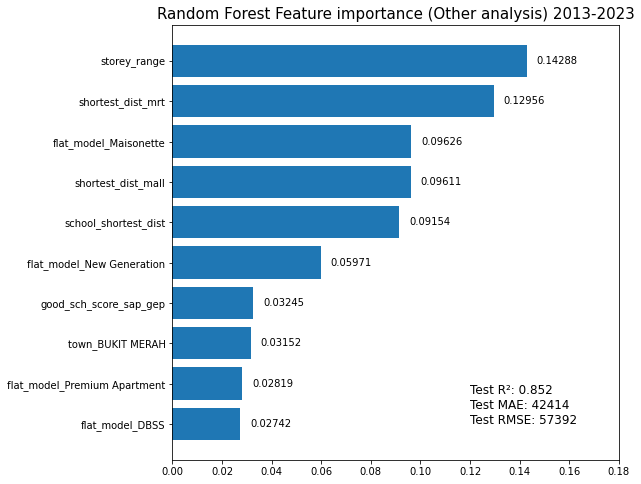

In [71]:
fig, ax = plt.subplots(figsize=(8,8))
rf_3_importance_graph = rf_3_importance.head(10)
graph = ax.barh(rf_3_importance_graph['Features'], rf_3_importance_graph['Coeff'])
plt.title('Random Forest Feature importance (Other analysis) 2013-2023', size = 15)
plt.annotate(('Test R\u00b2: ' + str(round(rf_3_r2,3)) + '\nTest MAE: ' + str(round(rf_3_mae))+
             '\nTest RMSE: ' + str(round(rf_3_rmse))),
             xy=(0.12,9), fontsize = 12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.bar_label(graph, fmt='%.5f', padding =10)
ax.set_xlim(right=0.18) 
ax.invert_yaxis()


plt.show()

SHAP values

In [62]:
import shap

In [63]:
model = RandomForestRegressor(random_state=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [64]:
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test.iloc[[16]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[16]])

In [65]:
shap.initjs()
shap_values = explainer.shap_values(X_test.iloc[[1]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[1]])

Smallest Y Values

In [66]:
y_test = y_test.reset_index()

In [67]:
smallest = y_test['adjusted_price'].nsmallest(2).index

In [68]:
shap.initjs()
smallest_1 = smallest[0]
shap_values = explainer.shap_values(X_test.iloc[[smallest_1]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[smallest_1]])

In [69]:
shap.initjs()
smallest_2 = smallest[1]
shap_values = explainer.shap_values(X_test.iloc[[smallest_2]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[smallest_2]])
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[smallest_2]],show=False,matplotlib=True).savefig('low_2014.png')

Median Y Values

In [70]:
temp = y_test['adjusted_price']

# get the median value of the Series
median = temp.quantile(0.5)

# set the range around the median to include the two values closest to it
range_low = median - 0.5 * (temp.max() - temp.min()) / len(temp)
range_high = median + 0.5 * (temp.max() - temp.min()) / len(temp)

# use boolean indexing to get the indexes of the values that fall within the range around the median
median_indexes = temp[(temp >= range_low) & (temp <= range_high)].index

In [71]:
shap.initjs()
median_1 = median_indexes[0]
shap_values = explainer.shap_values(X_test.iloc[[median_1]])
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[median_1]])
#shap.force_plot(explainer.expected_value[0], shap_values[0], np.round(X_test.iloc[[median_1]],4),show=False,matplotlib=True).savefig('med_2014.png')
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[median_1]])

In [72]:
shap.initjs()
median_2 = median_indexes[1]
shap_values = explainer.shap_values(X_test.iloc[[median_2]])
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[median_2]],show=False,matplotlib=True).savefig('med_2014.png')
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[median_2]])
#shap.force_plot(explainer.expected_value[0], shap_values[0], np.round(X_test.iloc[[median_2]],4),show=False,matplotlib=True).savefig('med_2014.png')

Largest Y Values

In [73]:
largest = y_test['adjusted_price'].nlargest(2).index

In [74]:
shap.initjs()
largest_1 = largest[0]
shap_values = explainer.shap_values(X_test.iloc[[largest_1]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[largest_1]])

In [75]:
shap.initjs()
largest_2 = largest[1]
shap_values = explainer.shap_values(X_test.iloc[[largest_2]])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[[largest_2]])

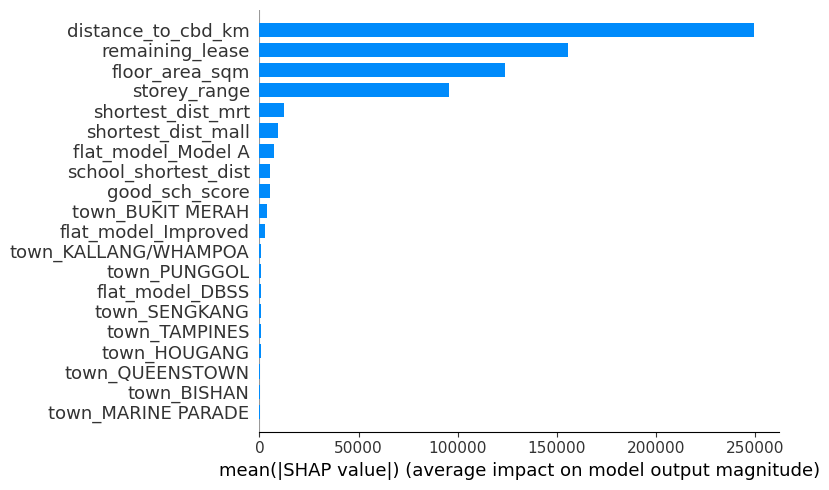

In [76]:
shap.summary_plot(shap_values, X_test, plot_type='bar', plot_size = (8,5))